#  Supervised Learning Case Study

## 1. Load required packages

In [1]:
# import some basics
import time
import matplotlib.pyplot as plt
import numpy as np

# import sklearn backend things
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# import sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import keras utilities for dataloading
from keras import backend as K
from keras.datasets import mnist,cifar10,fashion_mnist

In [2]:
%matplotlib inline

## 2. Download dataset with Keras

### <span style="color:blue">TODO: Experiment with different datasets: `mnist`, `fashion_mnist` and `cifar10` </span>

We work with on of three datasets: [MNIST](http://yann.lecun.com/exdb/mnist/), [CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html), [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

Download the data with Keras, already split between train and test sets

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## 3. Analyze and process dataset

In [17]:
# input image dimensions
n_channels = 1 if len(X_train.shape) < 4 else X_train.shape[3]
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], n_channels, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], n_channels, img_rows, img_cols)
    input_shape = (n_channels, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, n_channels)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, n_channels)
    input_shape = (img_rows, img_cols, n_channels)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [18]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [19]:
y_train = np.ndarray.flatten(y_train)
y_test = np.ndarray.flatten(y_test)

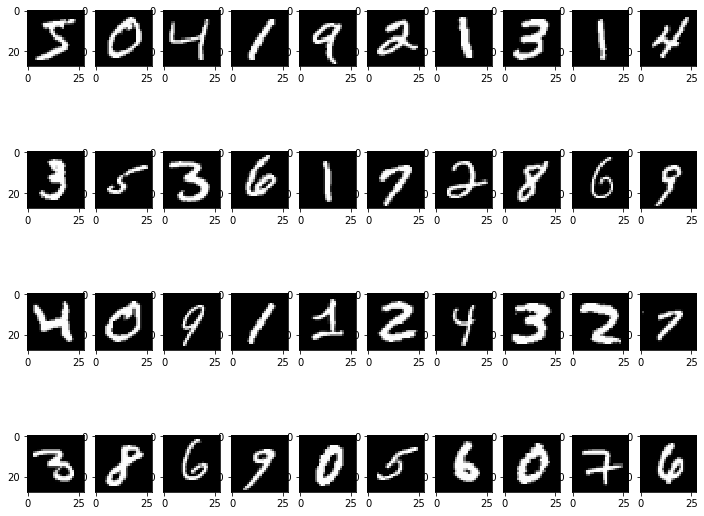

In [20]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(np.squeeze(X_train[i,:,:,:]),interpolation='nearest',cmap='gray')
plt.show()

### Transform data from matrix shape (e.g. 28x28) to vector shape (e.g. 784-dimensional)

In [21]:
X_train = X_train.reshape((X_train.shape[0],-1))
X_test  = X_test.reshape((X_test.shape[0],-1))

### Scale data

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Split into train and test set

### Already done during loading

## 5. Choose classifier method and fit on data

### <span style="color:blue">TODO: Experiment with different classifiers and parameter choices!</span>


* <span style="color:blue"> Use `DecisionTreeClassifier`, `RandomForestClassifier` and possibly [others](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)</span>
* <span style="color:blue">Try different parameter settings for each classifier</span>
* <span style="color:blue">Optional: Automate the search for good parameters</span>
 
    

In [23]:
clf = LogisticRegression(C=1, penalty='l2', solver='saga', tol=0.1)
#clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
#clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

### Train the classifier algorithm

In [28]:
clf = clf.fit(np.array(X_train), y_train.ravel())

## 6. Use trained model to predict labels for train and test set

In [29]:
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print("Train score: %.4f" % train_accuracy)
print("Test score:  %.4f" % test_accuracy)

Train score: 0.8894
Test score:  0.8917
